<a href="https://colab.research.google.com/github/MadhuraTonpe165/Assignments/blob/main/DecisionTree_Assignment_Obesity_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sujithmandala/obesity-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.08k/1.08k [00:00<00:00, 2.00MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sujithmandala/obesity-classification-dataset/versions/1


In [3]:
# Load the data
df = pd.read_csv(f'{path}/Obesity Classification.csv')
#/root/.cache/kagglehub/datasets/sujithmandala/obesity-classification-dataset/versions/1/Obesity Classification.csv

# Show first 5 rows of the data
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
# EDA
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [14]:
df = df.drop('ID', axis = 1)
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Label'] = df['Label'].replace({'Normal Weight': 1, 'Overweight' : 2, 'Underweight' : 3, 'Obese' : 4})
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,1
1,30,0,160,60,22.5,1
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,4


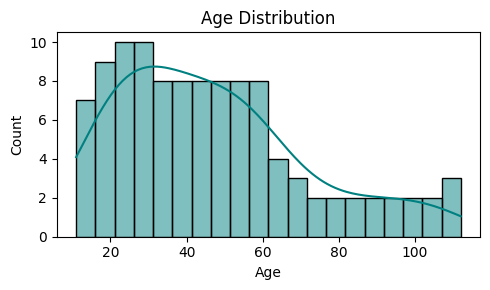

In [5]:
# Plot the distrribution of age
plt.figure(figsize = (5,3))
sns.histplot(df['Age'], bins = 20, kde = True , color = 'teal' )
plt.title("Age Distribution")
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In [ ]:
'''
We have almost equal amount of data for age group till 60, but few data points for age group above 60.
'''

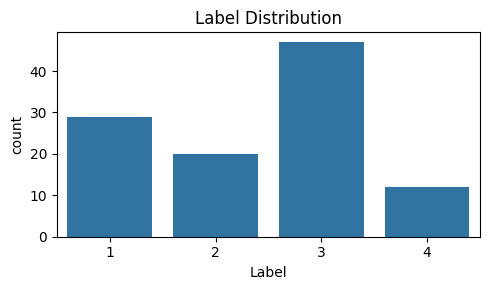

In [15]:
# Plot Label Distribution
plt.figure(figsize = (5,3))
sns.countplot(data = df, x = df['Label'])
plt.title("Label Distribution")
plt.xlabel('Label')
plt.tight_layout()
plt.show()

In [ ]:
'''
We can observe that data is not equally distributed for each label.
'''

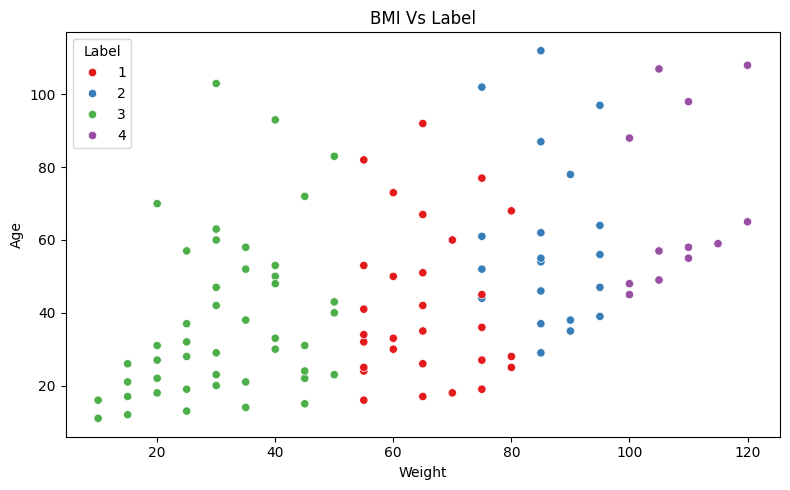

In [17]:
# BMI Vs Label
plt.figure(figsize = (8,5))
sns.scatterplot(data = df, y = 'Age', x = 'Weight', hue = 'Label', palette= 'Set1')
plt.title("BMI Vs Label")
plt.ylabel('Age')
plt.xlabel('Weight')
plt.tight_layout()
plt.show()

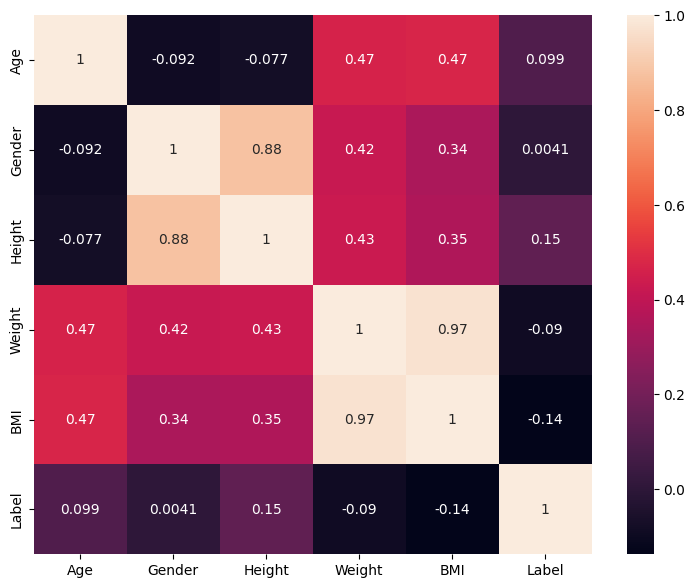

In [18]:
# Correlation between data
plt.figure(figsize = (9,7))
sns.heatmap(df.corr(numeric_only = True), annot= True)
plt.show()

In [ ]:
'''
We can see that Weight and BMi have a strong corrlationship.
Gender and Height also have a strong correlationship
Weight, Height and Age have weak correlation with each other
'''

# Decision Tree Model

In [19]:
# Separating input features and target variable
X = df.drop('Label', axis = 1)
y = df['Label']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 5)

In [20]:
# Creating a Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# Taking Predictions from the model
y_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)

In [23]:
# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.95
Testing Precision : 0.97
Testing Recall : 0.95
Testing F1 Score : 0.96


In [ ]:
'''
From the output of the above code, we can see that model is overfitted
'''

# PerformHyper Parameter Optimizationing

# GridSearchCV()

In [24]:
# GridSearchCV()
from sklearn.model_selection import GridSearchCV
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [25]:
# Using GridSearchCV
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = params, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [26]:
# Getting the best parameter combination
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [27]:
# Creating the Optimal Model
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 2, min_samples_split = 2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [28]:
# Taking predictions from the model
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [29]:
# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.95
Testing Precision : 0.97
Testing Recall : 0.95
Testing F1 Score : 0.96


In [ ]:
# We are still getting an overfitted model

# RandomizedSearchCV()

In [30]:
from sklearn.model_selection import RandomizedSearchCV

# Creating a parameter dictionary
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1, 2, 3, 4, 5],
    'min_samples_split' : [2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}

In [31]:
# Fitting the RandomizedSearchCV()
clf = DecisionTreeClassifier()
random_search = RandomizedSearchCV(estimator = clf, param_distributions = params, cv = 5, verbose = 1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5]},
                   verbose=1)

In [32]:
# Getting the beat parameters
print(random_search.best_params_)

{'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 4, 'criterion': 'entropy'}


In [33]:
# Creating teh Optimal Model
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 2, min_samples_split = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=3)

In [34]:
# Taking the predictions from the model
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [35]:
# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.95
Testing Precision : 0.97
Testing Recall : 0.95
Testing F1 Score : 0.96


In [ ]:
# We are still getting an overfitted model